# IRIS

In [ ]:
**Data Description:** It is looks like a tabular dataset with four columns: "sepal length (cm)", "sepal width (cm)", "petal length (cm)", and "petal width (cm)". Each row represents a different observation or sample.

**Here's a brief description of each column:

**Sepal Length (cm):** This column represents the length of the sepal, which is one of the outer parts of a flower. It's measured in centimeters (cm).

**Sepal Width (cm):** This column represents the width of the sepal, measured in centimeters (cm).

**Petal Length (cm):** This column represents the length of the petal, which is another part of a flower. It's measured in centimeters (cm).

**Petal Width (cm):** This column represents the width of the petal, measured in centimeters (cm).

These measurements are commonly used in botany and particularly in the study of flowers, like in the case of the Iris dataset, where they are used to classify different species of Iris flowers.


In [3]:
#Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading Datastet
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
#Assigns column names to it using the feature names from the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#This line of code creates a new column in the iris_df DataFrame called 'species' and populates it with the corresponding species names based on the numerical labels stored in iris.target. It then prints the DataFrame with the species names instead of numerical labels.
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
print(iris_df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

In [8]:
#Determine the x and y
X = iris.data  # Features
y = iris.target  # Labels

C:\Users\SUJI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


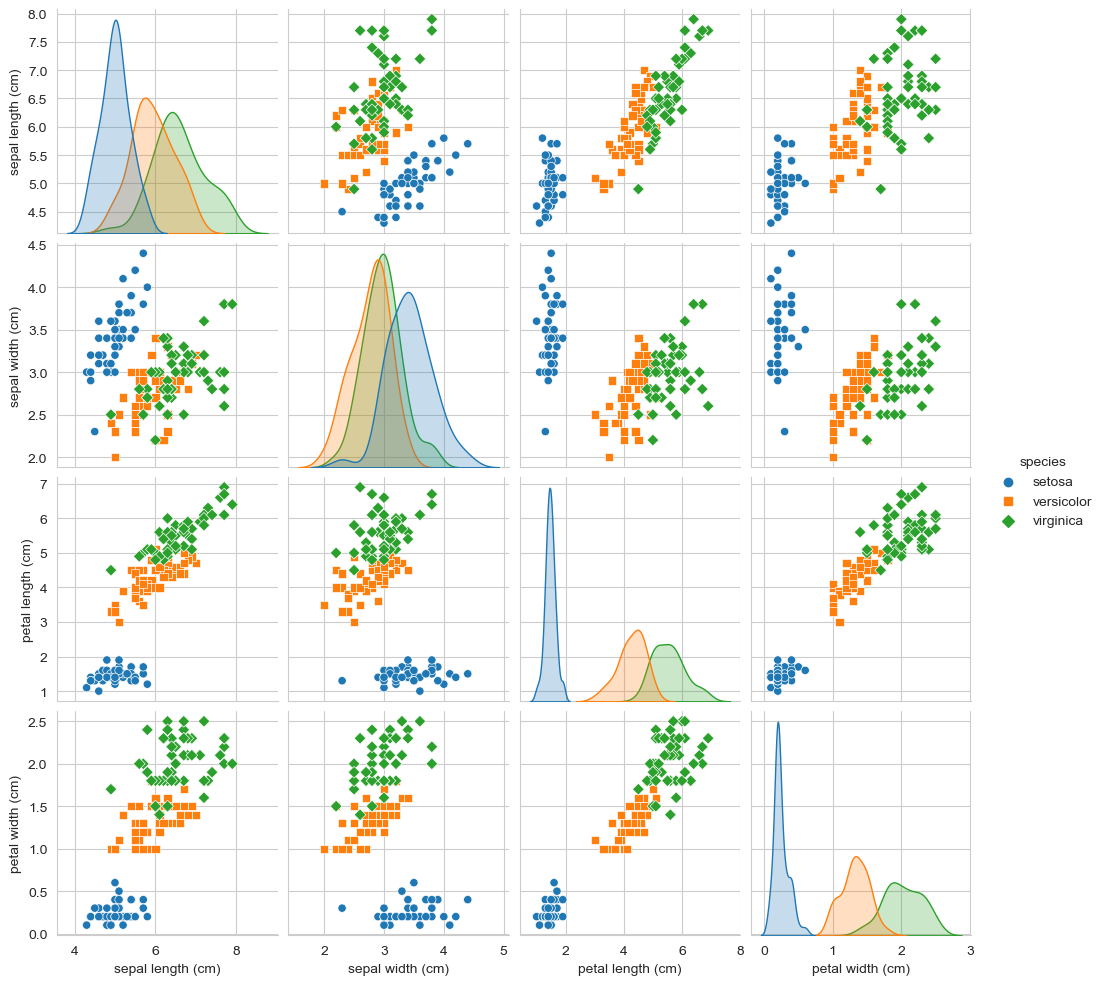

In [9]:
# Create a scatter plot using Seaborn
sns.set_style("whitegrid")
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"],  height=2.5)
plt.show()

In [13]:
#This code splits test and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#It creates a Support Vector Machine (SVM) classifier model with a linear kernel.

from sklearn.svm import SVC
model = SVC(kernel='linear')

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [16]:
#This line of code trains the SVM classifier model (model) using the training data (X_train, y_train).
model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
#This line of code uses the trained SVM classifier model (model) to predict the target labels (y_pred) for the test data (X_test).
y_pred = model.predict(X_test)

In [18]:
#Calculate the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [19]:
#It prints a classification report summarizing the performance of the classification model 
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
#Perform cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print mean accuracy
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean Accuracy: 0.9800000000000001


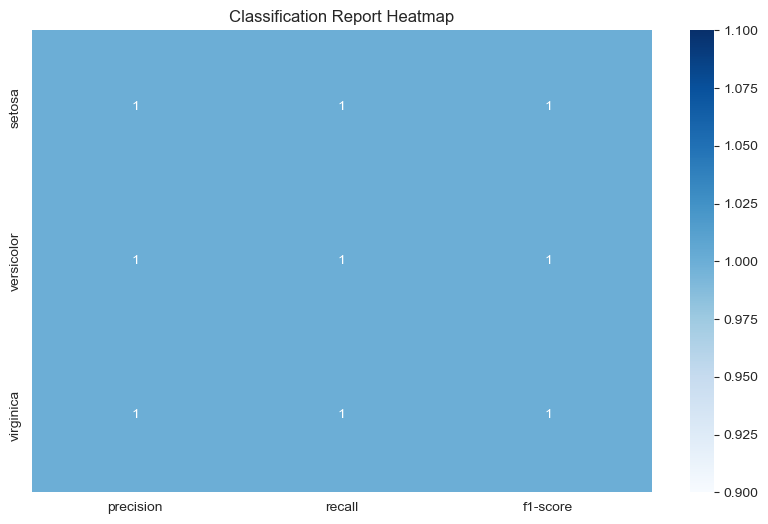

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)

# Convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-3, :-1], annot=True, cmap="Blues")
plt.title('Classification Report Heatmap')
plt.show()


**Observations:

**Precision, Recall, and F1-score:** For each class (setosa, versicolor, virginica), the precision, recall, and F1-score are all perfect, indicating that the model's predictions for each class are accurate. This suggests that the model performs well in distinguishing between different classes.

**Support:** The support column shows the number of samples for each class in the test set. It seems that there are 10 samples for setosa, 9 samples for versicolor, and 11 samples for virginica.

**Accuracy:** The overall accuracy of the model on the test set is 100%, indicating that all predictions made by the model match the actual labels in the test set.

**Macro Average:** The macro average for precision, recall, and F1-score is also 100%, suggesting that the model performs equally well across all classes.

**Cross-Validation Scores:** The cross-validation scores range from 0.966 to 1.0, with a mean accuracy of approximately 98.0%. This indicates that the model's performance is consistent across different subsets of the data.

